## 6.5 Unsupervised Machine Learning: K-means Clustering, Silhouette Coefficient

## Index
[1. Import Libraries and Datasets](#1.-Import-Libraries-andDatasets)
<br>
[2. Data Cleaning](#2.-Data-Cleaning)
<br>
[3. Elbow Technique](#3.-Elbow-Technique)
<br>
[4. K-means Clustering](#4.-K-means-Clustering)
<br>
[5. K-means Aggregations](#5.-K-means-Aggregations)
<br>
[6. Silhouette Coefficient](#6.-Silhouette-Coefficient)

### 1. Import Libraries and Datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as cm
import matplotlib.pyplot as plt
import os
import sklearn
import pylab as pl 
import numpy as np

from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# import datasets

# create path for dataset 
path = r'C:\Users\pears\Desktop\CF\Achievement 6\datasets'

# create filepaths
filepath = os.path.join(path, '.pkl', 'only_nec.pkl')

# assign df name
df = pd.read_pickle(filepath)

### 2. Data Cleaning

In [5]:
# remove column limit of output 
pd.options.display.max_columns = None

# remove row limit of output 
pd.options.display.max_rows = None

In [6]:
df.head()

,Entity,Code,Continent,Region,Anxiety,Depressive,AHDI,F/F_A/D_YES,VComfortable,vs,F/F,nature,lifestyle,relationships,work,meds,prof,religious,life_ladder,social_support,life_expect,choice_freedom,corruption,pos,neg
0,Afghanistan,AFG,Asia,Southern Asia,5.0337,5.1315,0.1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.662,0.491,53.25,0.427,0.954,0.435,0.371
1,Albania,ALB,Europe,Southern Europe,4.0993,2.6280,0.5165,28.00,25.49,-0.09,86.52499,88.64183,67.71693,54.1925,39.66084,40.89743,34.49906,36.1776,4.640,0.638,69.05,0.750,0.876,0.547,0.334
2,Algeria,DZA,Africa,Northern Africa,5.0529,4.3729,0.3229,20.88,31.64,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.249,0.807,66.20,0.437,0.700,0.555,0.289
3,American Samoa,ASM,Oceania,Polynesia,4.2545,2.7973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,6.0083,3.9744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(205, 25)

In [8]:
# choosing select columns for K-means model; omitting categorical columns
unsup = df[['Anxiety', 'Depressive', 'AHDI', 'VComfortable', 'vs', 'F/F', 'social_support']]

In [9]:
unsup.head()

,Anxiety,Depressive,AHDI,VComfortable,vs,F/F,social_support
0,5.0337,5.1315,0.1804,NaN,NaN,NaN,0.491
1,4.0993,2.6280,0.5165,25.49,-0.09,86.52499,0.638
2,5.0529,4.3729,0.3229,31.64,0.52,NaN,0.807
3,4.2545,2.7973,NaN,NaN,NaN,NaN,NaN
4,6.0083,3.9744,NaN,NaN,NaN,NaN,NaN


In [10]:
unsup.shape

(205, 7)

In [11]:
# drop all NaN as they are not allowed to run K-means model 
unsup_nonan = unsup.dropna()

In [12]:
unsup_nonan.shape

(96, 7)

### 3. Elbow Technique

In [13]:
# see how many clusters is optimal for this df by first suggesting a range of 1-10
num_cl = range(1, 10)

# define k-means clusters in the above range
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [14]:
# create rate of variation, or score, for each cluster size created above 
score = [kmeans[i].fit(unsup_nonan).score(unsup_nonan) for i in range(len(kmeans))] 

score

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

[-22616.126846804942,
 -10902.608160353917,
 -7214.302573787205,
 -5681.265953659545,
 -4485.639897088317,
 -3701.0111484745194,
 -3079.344113790474,
 -2665.477600479123,
 -2321.4819153572466]

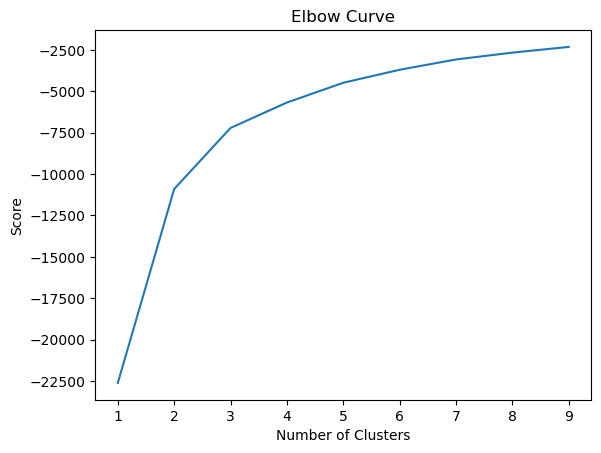

In [15]:
# plot elbow curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Number of clusters = 3?? 

### 4. K-means Clustering

In [16]:
# create k-means object w 3 clusters

kmeans = KMeans(n_clusters = 3) 

In [17]:
# fit k-means object to data

kmeans.fit(unsup_nonan)

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
# create column named 'clusters' in unsup_nonan to show cluster group assigned number 

unsup_nonan['clusters'] = kmeans.fit_predict(unsup_nonan)

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pears\AppData\Local\Temp\ipykernel_2332\13162791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsup_nonan['clusters'] = kmeans.fit_predict(un

In [19]:
unsup_nonan.head()

,Anxiety,Depressive,AHDI,VComfortable,vs,F/F,social_support,clusters
1,4.0993,2.6280,0.5165,25.49,-0.09,86.52499,0.638,0
7,5.3559,2.5877,0.5809,26.54,-0.50,71.96290,0.907,0
9,6.4060,4.8278,0.8479,7.19,-0.86,83.66190,0.950,2
10,6.5819,3.4246,0.7383,47.74,0.13,87.92614,0.906,1
13,5.1520,4.7245,0.3009,43.19,-0.06,79.08222,0.876,1


In [20]:
unsup_nonan['clusters'].value_counts()

0    47
2    32
1    17
Name: clusters, dtype: int64

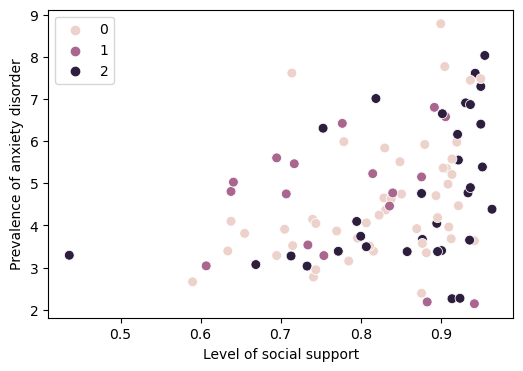

In [21]:
# plot clusters for 'social_support' and 'anxiety' variables

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=unsup_nonan['social_support'], y=unsup_nonan['Anxiety'], hue=kmeans.labels_, s=50) 

ax.grid(False)
plt.xlabel('Level of social support')
plt.ylabel('Prevalence of anxiety disorder')
plt.show()

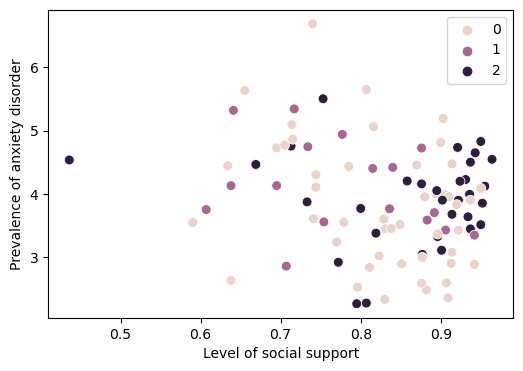

In [22]:
# plot clusters for 'social_support' and 'depressive' variables

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=unsup_nonan['social_support'], y=unsup_nonan['Depressive'], hue=kmeans.labels_, s=50) 

ax.grid(False)
plt.xlabel('Level of social support')
plt.ylabel('Prevalence of anxiety disorder')
plt.show()

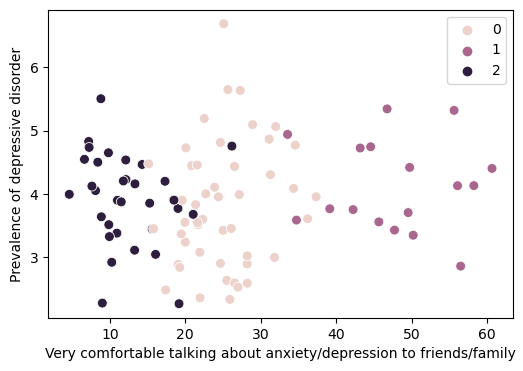

In [23]:
# plot clusters for 'VComfortable' and 'depressive' variables

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=unsup_nonan['VComfortable'], y=unsup_nonan['Depressive'], hue=kmeans.labels_, s=50) 

ax.grid(False)
plt.xlabel('Very comfortable talking about anxiety/depression to friends/family')
plt.ylabel('Prevalence of depressive disorder')
plt.show()

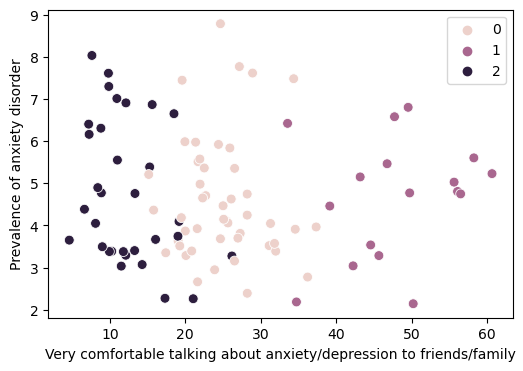

In [24]:
# plot clusters for 'VComfortable' and 'depressive' variables

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=unsup_nonan['VComfortable'], y=unsup_nonan['Anxiety'], hue=kmeans.labels_, s=50) 

ax.grid(False)
plt.xlabel('Very comfortable talking about anxiety/depression to friends/family')
plt.ylabel('Prevalence of anxiety disorder')
plt.show()

### 5. K-means Aggregations

In [25]:
unsup_nonan.loc[unsup_nonan['clusters'] == 2, 'clusters'] = '2'
unsup_nonan.loc[unsup_nonan['clusters'] == 1, 'clusters'] = '1'
unsup_nonan.loc[unsup_nonan['clusters'] == 0, 'clusters'] = '0'

C:\Users\pears\AppData\Local\Temp\ipykernel_2332\91232435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsup_nonan.loc[unsup_nonan['clusters'] == 2, 'clusters'] = '2'


I changed the newly labeled '2 dark purple', '1 purple' and '0 pink' back to numerical values bc I was getting errors when calculating the silouette scores below.

Should I have removed the 'clusters' column from the unsup_nonan dataframe before calculating the silouette scores below?

In [26]:
unsup_nonan.groupby('clusters').agg({'Anxiety':['mean', 'median'], 'Depressive':['mean', 'median'], 'AHDI':['mean', 'median'], 'VComfortable':['mean', 'median'], 'vs':['mean', 'median'], 'F/F':['mean', 'median'], 'social_support':['mean', 'median']})

Anxiety          Depressive               AHDI           \
              mean   median       mean   median      mean   median   
clusters                                                             
0         4.588119  4.14740   3.812545  3.60400  0.459760  0.45360   
1         4.662618  4.80730   4.124859  4.12780  0.391682  0.34520   
2         4.765272  4.23995   3.915428  3.94515  0.591875  0.69065   

         VComfortable                vs               F/F             \
                 mean  median      mean median       mean     median   
clusters                                                               
0           24.935957  24.660 -0.346596  -0.45  83.372610  84.327880   
1           47.902941  47.740  0.368235   0.27  76.590584  73.616430   
2           12.340625  11.255 -0.644687  -0.69  75.557099  75.804875   

         social_support          
                   mean  median  
clusters                         
0              0.824489  0.8380  
1              0.780000  0.7770  
2              0.861625  0.9015

I initially tried using the df with all 21 variables (with categorical columns removed). The elbow test looked very similar to what it is now, having reduced the variables to 7. 

Because the elbow test came out more rounded and an optimal number was hard to distinguish, I initially had k=5. Then I reduced it to 3 to see if that would improve the clusters but there were not notable differences.

The clusters, when plotted on the scatterplot, looks random. The only pattern I saw was when I plotted "very comfortable talking about A/D to F/F" against "anxiety" and "depressive" respectively. 

### 6. Silhouette Coefficient

I looked up the below codes and worked out the errors. I'm not sure if they're correct.

In [27]:
# Silouette coefficient for each K-mean model

# Range of models to test
cluster_range = [2, 3, 4, 5, 6]

# Create lists to store k-means and silhouette scores
silhouette_scores = []
kmeans_models = []

# Iterate through different cluster numbers
for n_clusters in cluster_range:
    kmeans_sc = KMeans(n_clusters=n_clusters)
    kmeans_sc.fit(unsup_nonan)
    
    # Predict cluster labels for each data point
    cluster_labels = kmeans_sc.predict(unsup_nonan)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(unsup_nonan, cluster_labels)
    
    # Append silhouette score and k-means model to lists
    silhouette_scores.append(silhouette_avg)
    kmeans_models.append(kmeans_sc)
    
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

Silhouette Score for 2 clusters: 0.5123917431962927
Silhouette Score for 3 clusters: 0.39661293413301024
Silhouette Score for 4 clusters: 0.36340034781022384
Silhouette Score for 5 clusters: 0.39289102696353906
Silhouette Score for 6 clusters: 0.3583519559212139


In [28]:
# Create a list to store K-mean models 
kmeans_models = []
for num_clusters in range(2, 7):
    kmeans_sc = KMeans(n_clusters=num_clusters)
    kmeans_sc.fit(unsup_nonan)
    kmeans_models.append(kmeans_sc)

# Create a list to store sizes of clusters for each K-mean model
cluster_sizes = []
for kmeans_sc in kmeans_models:
    
    # Predict cluster labels for each data point
    cluster_labels = kmeans_sc.predict(unsup_nonan)
    
    # Count the number of data points in each cluster
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_sizes.append(dict(zip(unique, counts)))

# Display the sizes of clusters for each K-means model
for k, sizes in enumerate(cluster_sizes, start=2):
    print(f'Clusters for k={k}: {sizes}')

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

Clusters for k=2: {0: 75, 1: 21}
Clusters for k=3: {0: 32, 1: 47, 2: 17}
Clusters for k=4: {0: 37, 1: 14, 2: 27, 3: 18}
Clusters for k=5: {0: 30, 1: 8, 2: 39, 3: 9, 4: 10}
Clusters for k=6: {0: 39, 1: 8, 2: 19, 3: 8, 4: 10, 5: 12}


C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

The k-mean models with the highest scores are:
- 2 (0.51)
- 5 (0.41)

But looking at the cluster sizes, k=2 has a large difference (75, 21), as does k=5 (42, 24, 13, 9, 8). I'm reading that the best k-mean has both a high score and an even distribution of cluster size. 

Next up are: 
- 3 (0.40) with 47, 32, 17
- 4 (0.36) with 37, 27, 18, 14
- 6 (0.33) with 36, 18, 15, 10, 9, 8

...which all still have imbalanced cluster sizes...

### 7. Export Dataframe

In [29]:
unsup_nonan.to_csv(os.path.join(path, '.csv', 'Tableau kmean cluster.csv'))